<a href="https://colab.research.google.com/github/metamath1/noviceml/blob/master/CHAP_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4장 그림 및 예제 코드


In [1]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [ ]:
# 데이터 파일 사용을 위한 github repo 복사
# !주의! 
# 구글 colab 환경에서 실행하는 경우만 실행하세요.
# 로컬환경에서는 실행하지 마세요.
!git clone -l -s https://github.com/metamath1/noviceml.git noviceml

Cloning into 'noviceml'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 65 (delta 5), reused 13 (delta 2), pack-reused 48
Unpacking objects: 100% (65/65), done.


In [ ]:
# 구글 colab 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
path = 'noviceml/font/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)

# 로컬 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
# https://financedata.github.io/posts/matplotlib-hangul-for-ubuntu-linux.html
# 아래 코드의 주석 제거 후 경로를 유저 컴퓨터의 폰트 파일 경로로 수정하세요.
# path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# fontprop = mfm.FontProperties(fname=path, size=18)

In [2]:
def arrowed_spines(fig, ax, axis='both', remove_ticks=False):
    """
    https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
    """
    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    if remove_ticks == True: 
        # removing the axis ticks
        plt.xticks([]) # labels 
        plt.yticks([])
        ax.xaxis.set_ticks_position('none') # tick markers
        ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./50.*(ymax-ymin) 
    hl = 1./25.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.4 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    if axis == 'x':
        ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
                 head_width=hw, head_length=hl, #overhang = ohg, 
                 length_includes_head= True, clip_on = False) 
    elif axis == 'y':
        ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
                 head_width=yhw, head_length=yhl, #overhang = ohg, 
                 length_includes_head= True, clip_on = False)
    else :
        ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
                 head_width=hw, head_length=hl, #overhang = ohg, 
                 length_includes_head= True, clip_on = False) 

        ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
                 head_width=yhw, head_length=yhl, #overhang = ohg, 
                 length_includes_head= True, clip_on = False)
   

## 에러를 줄이를 과정

- 에러를 줄이는 과정에서 해 찾기 경로를 보이기 위해 에러 함수와 에러함수의 도함수를 정의한다.

In [3]:
def f(x) :
    """
    Rosenbrock function, example 11.8 from [arora]
    """
    return 50*(x[1]-x[0]**2)**2 + (2-x[0])**2

def df(x) :  
    dx0 = -200*x[0]*(x[1]-x[0]**2)-2*(2-x[0])
    dx1 = 100*(x[1]-x[0]**2)
    
    return np.array([dx0, dx1])

- 에러 함수를 그려본다.

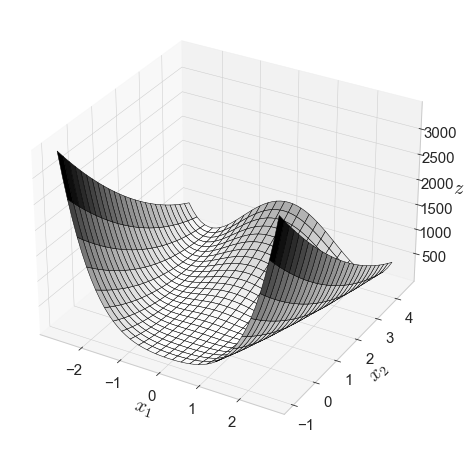

In [4]:
plt.figure(figsize=(8,8))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

x1 = np.linspace(-2.7, 2.7, 51)
x2 = np.linspace(-1, 4.5, 51)
X1, X2 = np.meshgrid(x1, x2)

ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, f([X1, X2]), cmap=plt.cm.binary, edgecolor="k")

ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

plt.show()

- `scipy.optimize.minimize`를 사용하여 에러 함수 곡면의 가장 낮은 곳을 찾아낸다.

In [5]:
from scipy.optimize import minimize

x0 = np.array([-2.5, 3])
ret = minimize(f, x0, jac=df, method='CG', options={'disp': True, 'return_all':True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 81
         Gradient evaluations: 81


- 해를 찾아가는 과정을 부드럽게 그리기 위해 탐색 경로를 세분화한다.

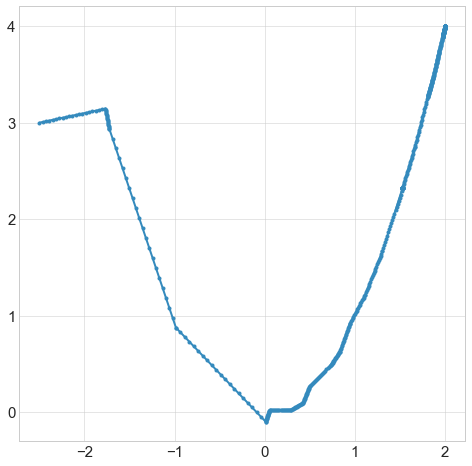

In [6]:
# make path refine
path = np.array(ret['allvecs']).T

K = 20
refine = []
for a in zip(path[:,:-1].T, path[:,1:].T):
    s, e = a
    d = e - s
    # d /= np.linalg.norm(d)
    #print(d)
    refine.append(s)
    for k in range(1,K):
        refine.append(s+(k/K)*d)
    refine.append(e)
refined = np.array(refine).T

plt.figure(figsize=(8,8))
plt.plot(refined[0,:], refined[1,:], '.-')
plt.show()

- 세분화된 경로를 사용하여 해찾기 경로를 2차원과 3차원에 그린다.

## 그림 4-1

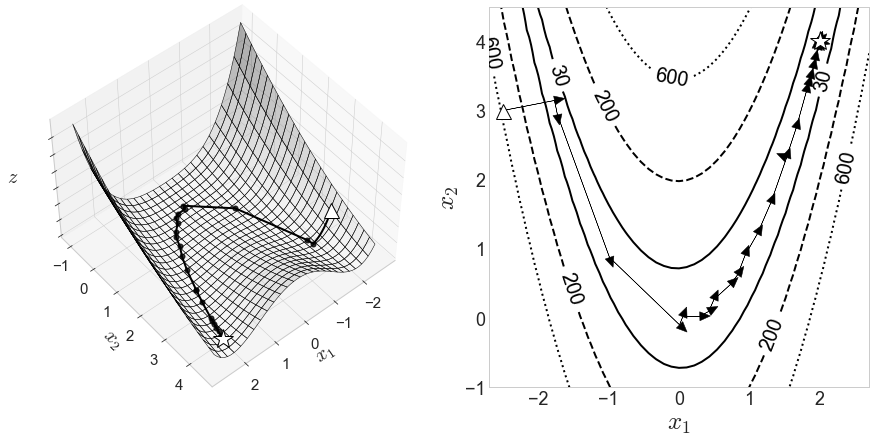

In [7]:
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel(r'$x_1$', fontsize=20)
ax1.set_ylabel(r'$x_2$', fontsize=20)
ax1.set_zlabel(r'$z$',   fontsize=20)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.set_zticklabels( () )

ax1.plot_surface(X1, X2, f([X1, X2]), 
                cmap=plt.cm.binary, edgecolor="k", alpha=0.3)
ax1.plot3D(refined[0,:], refined[1,:], f(refined), '-', color='k')
ax1.plot3D(path[0,:], path[1,:], f(path), 
          'o', markersize=5, color='k', alpha=0.8)
ax1.plot3D([path[0,0]], [path[1,0]], [f(path[:,0])], 
          '^', markersize=15, color='white', markeredgecolor='k')
ax1.plot3D([path[0,-1]], [path[1,-1]], [f(path[:,-1])], 
          '*', markersize=20, color='white', markeredgecolor='k')

ax1.view_init(50, 50)

###################################################################
ax2 = fig.add_subplot(1, 2, 2)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel(r'$x_1$', fontsize=25)
ax2.set_ylabel(r'$x_2$', fontsize=25)
ax2.grid(False)

contours = ax2.contour(X1, X2, f([X1, X2]), levels=[30, 200, 600],  colors='k', 
            linestyles=['solid','dashed', 'dotted'])
ax2.clabel(contours, contours.levels, fmt="%d", inline=True, fontsize=20)
ax2.plot([path[0,0]], [path[1,0]],
          '^', markersize=15, color='white', markeredgecolor='k')

for a in zip(path[:,:-1].T, path[:,1:].T):
    s, e = a
    d = e - s
    length = np.linalg.norm(d)

    ax2.arrow(s[0], s[1], d[0], d[1], color='k', head_width=0.13, head_length=0.15)

ax2.plot([path[0,-1]], [path[1,-1]],
          '*', markersize=20, color='white', markeredgecolor='k')    

if file_print == True :
    fig.savefig("imgs/chap4/fig4-1.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap4/fig4-1.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- 애니메이션으로 출력한다.

In [8]:
# https://stackoverflow.com/questions/41602588/matplotlib-3d-scatter-animations
from matplotlib import animation, rc
from IPython.display import HTML

def update_graph(i, refined):
    graph.set_data ([refined[0,i]], [refined[1,i]])
    graph.set_3d_properties([f(refined[:,i])])
    
    title.set_text('Interration={}'.format(i))
    
    return title, graph, 

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)
ax.set_zticklabels( () )
ax.view_init(50, 50)
title = ax.set_title('')

i = 0
graph, = ax.plot3D([refined[0,i]], [refined[1,i]], [f(refined[:,i])], 
                   'o', markersize=10, color='red')
ax.plot_surface(X1, X2, f([X1, X2]), cmap=plt.cm.binary, edgecolor="k", alpha=0.3)

ani = animation.FuncAnimation(fig, update_graph, refined.shape[1], 
                              fargs=(refined,), interval=20, blit=True)
rc('animation', html='html5')
HTML(ani.to_html5_video())

AttributeError: 'list' object has no attribute 'shape'

## 그림 4-2

In [9]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

a = 20
b = 100
c = 1.26
Km = 250
T = 200

def D(t):
    """
    0분에서 t분까지 이동거리를 구해주는 함수
    """
    def f(x):
        return 1 / (1+np.exp( -(1/a)*(x-b) )) * T * c

    return f(t)-f(0)

def avg_kmh(T):
    return ( D(T[1]) - D(T[0]) ) / (T[1]-T[0]) * 60.0
    

t = np.linspace(0, T, 200)
d = D(t)

ax.plot(t, np.ones(t.shape)*Km, '--', color='k')
ax.plot(np.ones(t.shape)*T, d, '--', color='k')
ax.plot(t, d, color='k')
ax.set_xlabel('시간(분)', fontproperties=fontprop)
ax.set_ylabel('이동거리 (km)', fontproperties=fontprop)

if file_print == True :
    fig.savefig("imgs/chap4/fig4-2.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap4/fig4-2.pdf", format='pdf', bbox_inches='tight')

plt.show()

# 시간의 구간을 지정하고 구간의 평균속도를 확인해보자.
# 전구간 : [0, T]
# 과속   : [100, 150]
ts = [100, 150]
print("{}분에서 {}분 사이의 평균속도 : {:.2f}km/h".format(ts[0], ts[1], avg_kmh(ts)))

NameError: name 'fontprop' is not defined

## 그림 4-3

In [10]:
import matplotlib.patches as patches
import matplotlib.cbook as cbook

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((15,7))

ax1.spines['left'].set_position('zero')
ax1.spines['bottom'].set_position('zero')
ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)

ax2.spines['left'].set_position('zero')
ax2.spines['bottom'].set_position('zero')
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)

a = 20
b = 100
c = 1.26
Km = 250
T = 200

def D(t):
    """
    0분에서 t분까지 이동거리를 구해주는 함수
    """
    def f(x):
        return 1 / (1+np.exp( -(1/a)*(x-b) )) * T * c

    return f(t)-f(0)

def avg_kmh(T):
    return ( D(T[1]) - D(T[0]) ) / (T[1]-T[0]) * 60.0
    

t = np.linspace(0, T, 200)
d = D(t)

ax1.plot(t, np.ones(t.shape)*Km, '--', color='k')
ax1.plot(np.ones(t.shape)*T, d, '--', color='k')
ax1.plot(t, d, color='k')

ax1.text(0, 30, "cctv", size=20, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0.3, 0.3, 0.3),
                   fc=(0.7, 0.7, 0.7),
                   )
         )
ax1.text(220, 250, "cctv", size=20, rotation=25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0.3, 0.3, 0.3),
                   fc=(0.7, 0.7, 0.7),
                   )
         )


ax1.set_xlabel('시간(분)', fontproperties=fontprop)
ax1.set_ylabel('이동거리 (km)', fontproperties=fontprop)

ax2.plot(t, np.ones(t.shape)*Km, '--', color='k')
ax2.plot(np.ones(t.shape)*T, d, '--', color='k')
ax2.plot(t, d, color='k')


ax2.text(90, 140, "cctv", size=20, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0.3, 0.3, 0.3),
                   fc=(0.7, 0.7, 0.7),
                   )
         )
ax2.text(180, 230, "cctv", size=20, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0.3, 0.3, 0.3),
                   fc=(0.7, 0.7, 0.7),
                   )
         )


ax2.set_xlabel('시간(분)', fontproperties=fontprop)
ax2.set_ylabel('이동거리 (km)', fontproperties=fontprop)

if file_print == True :
    fig.savefig("imgs/chap4/fig4-3.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap4/fig4-3.pdf", format='pdf', bbox_inches='tight')

plt.show()

NameError: name 'fontprop' is not defined

## 그림 4-4

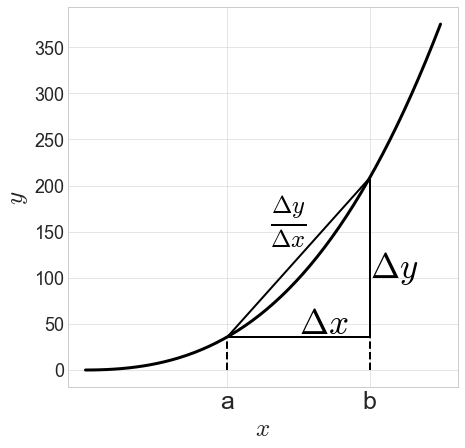

In [11]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)

x = np.linspace(0,5)

def f(x):
    return 2*x**3 + 5*x**2

a , b = 2,4 

ax.plot(x, f(x), lw=3, color='k')
ax.plot( (a,a), (0, f(a)), '--', lw=2 , color='k')
ax.plot( (b,b), (0, f(b)), '--', lw=2 , color='k')
ax.plot( (a,b), (f(a), f(b)), lw=2, color='k') #평균변화율
ax.plot( (a,b), (f(a), f(a)), lw=2, color='k') #dx
ax.plot( (b,b), (f(a), f(b)), lw=2, color='k') #dy
ax.text(3, 40, r'$\Delta x$', color='black', fontdict={ 'size': 35, })
ax.text(4, 100, r'$\Delta y$', color='black', fontdict={ 'size': 35, })
ax.text(2.6, 150, r'$\frac{\Delta y}{\Delta x}$', color='black', fontdict={ 'size': 35, })
ax.set_xticks([a, b])
ax.set_xticklabels(['a', 'b'], fontsize=25)

if file_print == True :
    fig.savefig("imgs/chap4/fig4-4.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap4/fig4-4.pdf", format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
# 1. 아래 x0 위치에서 함수 x**2의 순간변화율을 2*x로 구한다. 
# 2. 우리가 가정한 방식대로 구간을 0.01로 해서 근사된 순간변화율을 구한다.
# 3. 두 결과를 프린트하여 비교한다.

x = 5

# 함수와 순간의 변화율을 계산해주는 알려진 함수를 정의한다.
f  = lambda x : x**2
df = lambda x : 2*x

print("df(x)={:.3f} at x={}".format(df(x), x))
print("df(x)={:.3f} at x={}".format((f(x+0.01)-f(x))/0.01, x))

df(x)=10.000 at x=5
df(x)=10.010 at x=5


In [ ]:
x = 5

f   = lambda x : np.exp(x)
df  = lambda x : np.exp(x)

print("df(x)={:.4f} at x={}".format(df(x), x))
print("df(x)={:.4f} at x={}".format((f(x+0.0001)-f(x))/0.0001, x))

df(x)=148.4132 at x=5
df(x)=148.4206 at x=5


## 그림 4-5

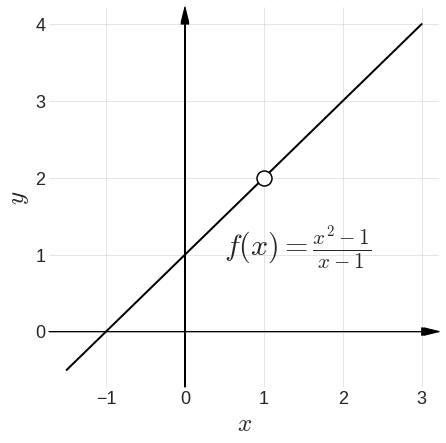

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.arrow(-2, 0, 5, 0, lw=1, head_width=0.1, head_length=0.15, fc='k', ec='k')
ax.arrow(0, -1, 0, 5, lw=1, head_width=0.1, head_length=0.15, fc='k', ec='k')
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)

f = lambda x: (x**2 - 1) / (x -1)
x = np.linspace(-1.5, 3, 101)

ax.plot(x, f(x), color='k', lw=2)
ax.plot(1,2, 'o',   markersize=15, markerfacecolor='w',
         markeredgewidth=1.5, markeredgecolor='k')
ax.text(0.5, 1, r"$f(x) = \frac{x^2 - 1}{x-1}$", fontsize=30)

arrowed_spines(fig, ax)

if file_print == True :
    fig.savefig("imgs/chap4/fig4-5.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap4/fig4-5.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 4-6

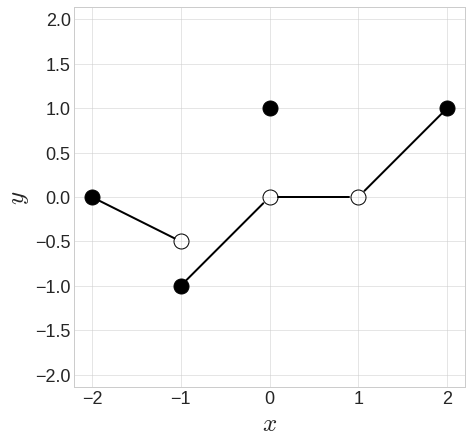

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

x1 = np.linspace(-2, -1.07, 10)
x2 = np.linspace(-1, -0.07, 10)
x3 = np.linspace(0.1, 0.9, 10)
x4 = np.linspace(1.07, 2, 10)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)

ax.plot(x1, -(0.5*x1+1), 'k', x2, x2, 'k', x3, [0]*(x3.shape[0]), 'k', x4, (x4-1), 'k')
ax.plot(-2, 0, 'o', color='k', markersize=15,)
ax.plot(-1, -0.5, 'o', color='k', markersize=15, fillstyle='none')

ax.plot(-1, -1, 'o', color='k', markersize=15,)
ax.plot(0, 0, 'o',   color='k', markersize=15, fillstyle='none')

ax.plot(1, 0, 'o',   color='k', markersize=15, fillstyle='none')
ax.plot(2, 1, 'o',   color='k', markersize=15, )

ax.plot(0, 1, 'o',   color='k', markersize=15, )

plt.axis('equal')

if file_print == True :
    fig.savefig("imgs/chap4/fig4-6.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap4/fig4-6.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 4-7

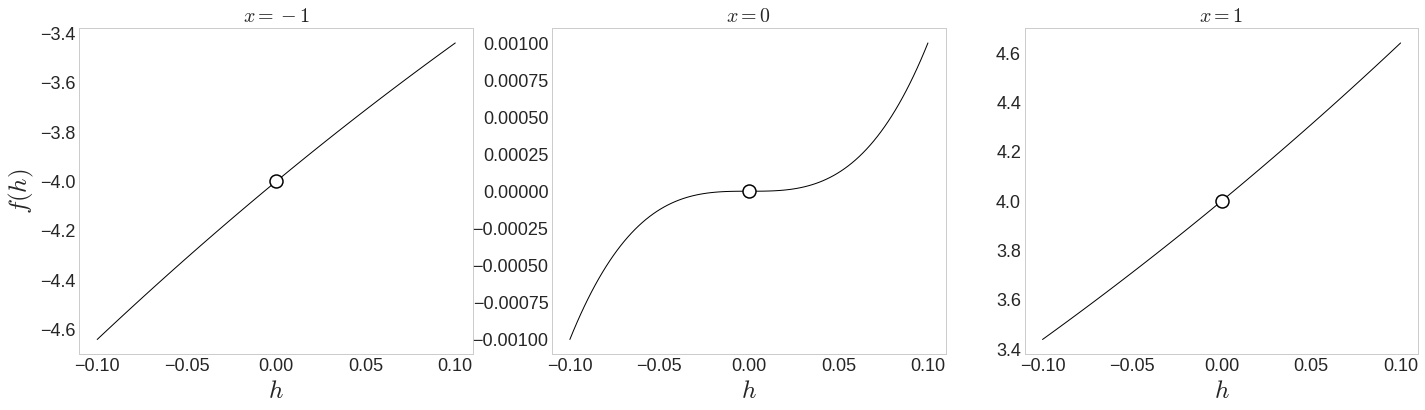

In [ ]:
fig, ax = plt.subplots(1,3, sharex=True)
fig.set_size_inches(24,6)

f = lambda x : x**4

xs = [-1, 0, 1]
ls = ['-', '-', '-']
df = lambda h : (f(x+h) - f(x)) / h

h = np.linspace(-0.1, 0.1, 100)

for i, x in enumerate(xs) : 
    ax[i].plot(h, df(h), lw=1, color='k')
    ax[i].plot(0, df(0.00001), 'o',   markersize=13, markerfacecolor='w',
         markeredgewidth=1.5, markeredgecolor='k')
    ax[i].set_title(r'$x={}$'.format(x), fontsize=20)
    ax[i].set_xlabel(r'$h$', fontsize=25)
    
    if i == 0:
        ax[i].set_ylabel(r'$f(h)$', fontsize=25)
        
    ax[i].xaxis.set_tick_params(labelsize=18)
    ax[i].yaxis.set_tick_params(labelsize=18)   
    # ax[i].set_yticklabels( () )
    ax[i].grid(False)

#plt.subplots_adjust(hspace=0.05, wspace=0.05)

if file_print == True :
    fig.savefig("imgs/chap4/fig4-7.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap4/fig4-7.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 4-8

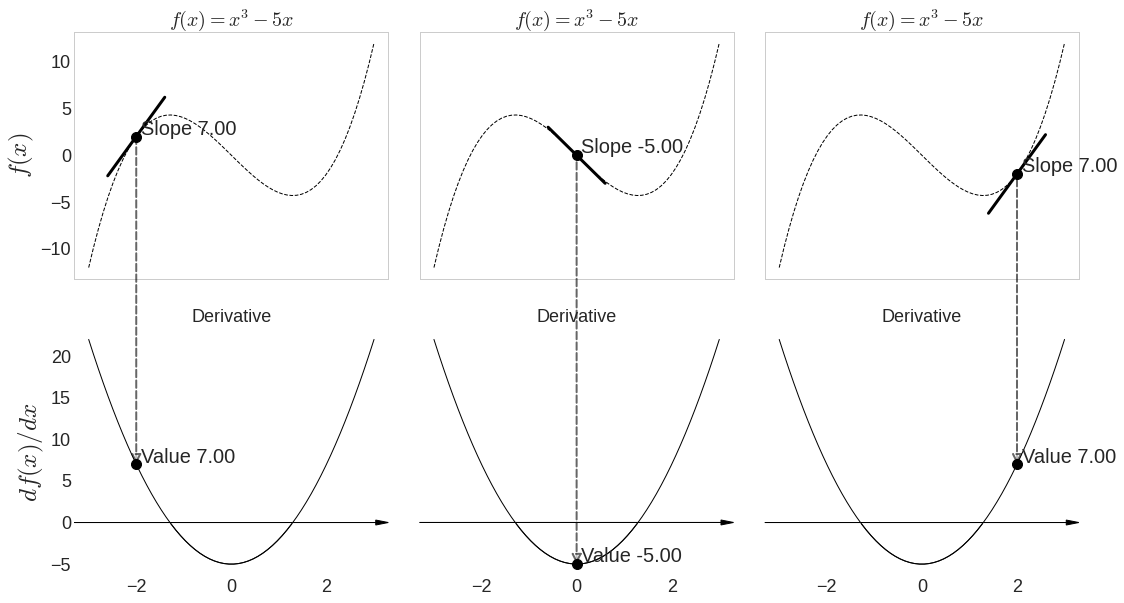

In [ ]:
from matplotlib.patches import ConnectionPatch

fig, ax = plt.subplots(2, 3)
fig.set_size_inches((18,10))

def f(x) :
    return  x**3 - 5*x

def fdot(x):
    return 3*x**2 - 5

step = 60
x = np.linspace(-3, 3, step)

fdotx = fdot(x)
m_idx = np.where(fdotx<0)[0]
p_idx = np.where(fdotx>=0)[0]

#numerical deriv.
method = 'center'
eps = 0.01
itv=0.6
slope_points = (-2, 0, 2)

for i, j in enumerate((0, 1, 2)):
    ax[0,i].plot(x, f(x), '--', color='k', lw=1)
    ax[1,i].plot(x, fdotx,  color='k', lw=1)
    ax[1,i].plot(x[m_idx], fdotx[m_idx], color='k', lw=1)

    x0 = slope_points[j]
    diff = (f(x0+eps/2) - f(x0-eps/2))/eps

    # anti-derivative
    img1_cp    = ax[0,i].plot(x0, f(x0), 'o', markersize=10, color='k', zorder=3)
    img1_slope = ax[0,i].plot([x0-itv, x0+itv], [f(x0)-diff*itv, f(x0)+diff*itv], lw=3, color='k')
    img1_text  = ax[0,i].text(x0 + 0.1 ,f(x0)+0.2, r"Slope {:.2f}".format(diff), fontsize=20)
    ax[0,i].xaxis.set_tick_params(labelsize=18)
    ax[0,i].yaxis.set_tick_params(labelsize=18)
    ax[0,i].set_title(r"$f(x)=x^3 - 5x$", fontsize=20)
    ax[0,i].grid(False)
    if i == 0:
        ax[0,i].set_ylabel(r'$f(x)$', fontsize=25)

    # derivative
    img2_cp    = ax[1,i].plot(x0, fdot(x0), 'o', markersize=10, color='k', zorder=3)
    con = ConnectionPatch(xyA=(x0, fdot(x0)), xyB=(x0, f(x0)), ls='--', coordsA="data", coordsB="data",
                  axesA=ax[1,i], axesB=ax[0,i], color='k', lw=2, alpha=0.6,
                  arrowstyle="<|-", mutation_scale=20, fc="w", zorder=2)
    ax[1,i].add_artist(con)
    img2_deriv = ax[1,i].text(x0 + 0.1 ,fdot(x0)+0.2, "Value {:.2f}".format(fdot(x0)), fontsize=20)
    ax[1,i].xaxis.set_tick_params(labelsize=18)
    ax[1,i].yaxis.set_tick_params(labelsize=18)
    ax[1,i].set_title(r"Derivative", fontsize=18)
    ax[1,i].grid(False)
    arrowed_spines(fig, ax[1,i], axis='x')
    if i == 0:
        ax[1,i].set_ylabel(r'$df(x)/dx$', fontsize=25)
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax_ in ax.flat:
    ax_.label_outer()
    
plt.subplots_adjust(hspace=0.2, wspace=0.1)

if file_print == True :
    fig.savefig("imgs/chap4/fig4-8.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap4/fig4-8.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 4-8 애니메이션

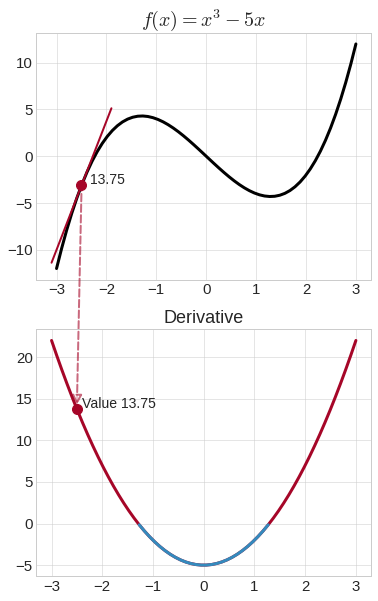

In [ ]:
from matplotlib.patches import ConnectionPatch

fig = plt.figure()
fig.set_size_inches((6,10))


def f(x) :
    return  x**3 - 5*x

def fdot(x):
    return 3*x**2 - 5

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

step = 60
x = np.linspace(-3, 3, step)
slope_points = np.linspace(-2.5, 2.5, step)

fdotx = fdot(x)
m_idx = np.where(fdotx<0)[0]
p_idx = np.where(fdotx>=0)[0]

ax1.plot(x, f(x), color='k', lw=3)
ax2.plot(x, fdotx,  color=style_colors[1], lw=3)
ax2.plot(x[m_idx], fdotx[m_idx], color=style_colors[0], lw=3)

#numerical deriv.
method = 'center'
eps = 0.01
itv=0.6
x = slope_points[0]
diff = (f(x+eps/2) - f(x-eps/2))/eps

   
img1_cp,    = ax1.plot(x, f(x), 'o', markersize=10, color=style_colors[0], zorder=3)
img1_slope, = ax1.plot([x-itv, x+itv], [f(x)-diff*itv, f(x)+diff*itv], lw=2, color=style_colors[1])
img1_text  = ax1.text(x + 0.1 ,f(x)+0.2, "Slope {:.2f}".format(diff), fontsize=14)
ax1.set_title(r"$f(x)=x^3 - 5x$", fontsize=20)

img2_cp,    = ax2.plot(x, fdot(x), 'o', markersize=10, color=style_colors[1], zorder=3)
con = ConnectionPatch(xyA=(x, fdot(x)), xyB=(x, f(x)), ls='--', coordsA="data", coordsB="data",
              axesA=ax2, axesB=ax1, color=style_colors[3], lw=2, alpha=0.6,
              arrowstyle="<|-", mutation_scale=20, fc="w", zorder=2)
ax2.add_artist(con)
img2_deriv = ax2.text(x + 0.1 ,fdot(x)+0.2, "Value {:.2f}".format(fdot(x)), fontsize=14)
ax2.set_title(r"Derivative", fontsize=18)

def update(i):
    global con
    
    x = slope_points[i]
    diff = (f(x+eps/2) - f(x-eps/2))/eps
    
    if diff > 0 :
        color = style_colors[1]
    else : 
        color = style_colors[0]

    img1_cp.set_color(color)
    img1_cp.set_data(x, f(x))
    img1_slope.set_color(color)
    img1_slope.set_data([x-itv, x+itv], [f(x)-diff*itv, f(x)+diff*itv])
    img1_text.set_position((x+0.1, f(x)+0.2))
    img1_text.set_text(" {:.2f}".format(diff))
    
    img2_cp.set_color(color)
    img2_cp.set_data(x, fdot(x))
    con.remove()
    con = ConnectionPatch(xyA=(x, fdot(x)+0.5), xyB=(x, f(x)-0.5), ls='--', coordsA="data", coordsB="data",
              axesA=ax2, axesB=ax1, color=color, lw=2, alpha=0.6,
              arrowstyle="<|-", mutation_scale=20, fc="w", zorder=2)
    ax2.add_artist(con)
    img2_deriv.set_position((x+0.1, fdot(x)+0.2))
    img2_deriv.set_text("Value {:.2f}".format(fdot(x)))
    
    return img1_cp, img1_slope, img1_text, img2_cp, img2_deriv,

ani = animation.FuncAnimation(fig, update, frames=np.arange(step), interval=50)
#ani.save('deriv-ani.gif', dpi=80, writer='imagemagick')

rc('animation', html='html5')
HTML(ani.to_html5_video())

## 그림 4-9

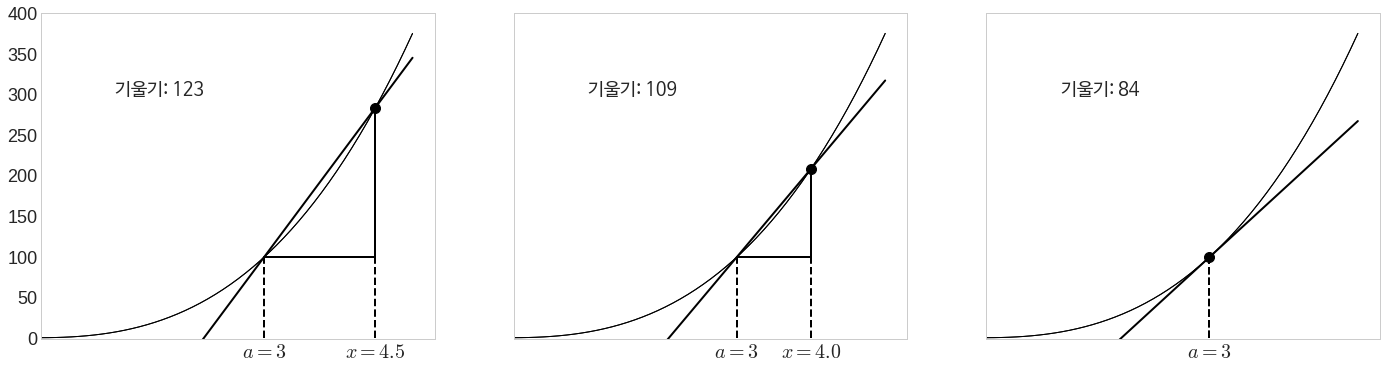

In [ ]:
fig, ax = plt.subplots(1,3, sharey=True)
fig.set_size_inches(24,6)

def f(x):
    return 2*x**3 + 5*x**2

x = np.linspace(0,5)
a , bs = 3, [4.5, 4, 3] 
d  = 0.01

for i, b in enumerate(bs) :
    ax[i].yaxis.set_tick_params(labelsize=18)
    ax[i].grid(False)
    ax[i].plot(x, f(x), color='k', lw=1)
    
    l = ((f(b+0.00001)-f(a))/(b+0.00001-a))*(1-a) + f(a)
    r = ((f(b+0.00001)-f(a))/(b+0.00001-a))*(5-a) + f(a)
    ax[i].plot(x, f(x), color='k', lw=1)
    avg, = ax[i].plot( (1, 5), (l, r),  color='k', lw=2) #평균변화율
    # avg, = ax[i].plot( (a,b), (f(a), f(b)),  color='k', lw=2) #평균변화율

    dx,  = ax[i].plot( (a,b), (f(a), f(a)), color='k', lw=2) #dx
    dy,  = ax[i].plot( (b,b), (f(a), f(b)), color='k', lw=2) #dy
    dx2, = ax[i].plot( (a,a), (0, f(a)), '--', color='k', lw=2 )
    dy2, = ax[i].plot( (b,b), (0, f(a)), '--', color='k', lw=2 )
    
    mp,  = ax[i].plot(b, f(b), 'ko', markersize=10)
    img1_text  = ax[i].text(1, 300, "기울기: {:.0f}".format( (f(b+0.00001)-f(a))/(b+0.00001-a) ), 
                            fontsize=17 , fontproperties=fontprop)

    if i == 2 :
        ax[i].set_xticks( [a] ) 
        ax[i].set_xticklabels( [r'$a=3$'], fontsize=20 )
    else :
        ax[i].set_xticks( [a, b] ) 
        ax[i].set_xticklabels( [r'$a=3$', '$x={:.1f}$'.format(b)], fontsize=20 )
    
    ax[i].set_xlim((0, 5.3))
    ax[i].set_ylim((-2, 400))

# fig.suptitle(r"$f(x)=2x^3 + 5x^2$", fontsize=20)
#fig.savefig("imgs/chap5/fig5-9.svg", format='svg', bbox_inches='tight')

if file_print == True :
    fig.savefig("imgs/chap4/fig4-9.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap4/fig4-9.pdf", format='pdf', bbox_inches='tight')
    
    
plt.show()

## 그림 4-9 애니메이션

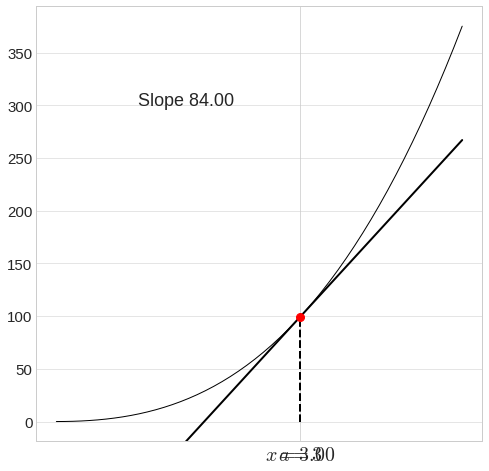

In [ ]:
###########################################
# 미분 = 기울기를 나타내는 애니메이션
###########################################
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure()
fig.set_size_inches((8,8))

x = np.linspace(0,5)

def f(x):
    return 2*x**3 + 5*x**2

a , b = 3, 5 
d  = 0.01

plt.plot(x, f(x), color='k', lw=1)
avg, = plt.plot( (a,b), (f(a), f(b)),  color='k', lw=2) #평균변화율

dx,  = plt.plot( (a,b), (f(a), f(a)), color='k', lw=2) #dx
dy,  = plt.plot( (b,b), (f(a), f(b)), color='k', lw=2) #dy
dx2, = plt.plot( (a,a), (0, f(a)), '--', color='k', lw=2 )
dy2, = plt.plot( (b,b), (0, f(a)), '--', color='k', lw=2 )
mp,  = plt.plot(b, f(b), 'ro', markersize=8)
img1_text  = plt.text(1, 300, "Slope {:.2f}".format((f(b)-f(a))/(b-a)), fontsize=18)

plt.xticks( [a, b], [r'$a=3$', '$x={:.2f}$'.format(b)] )
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
#plt.title(r"$f(x)=2x^3 + 5x^2$", fontsize=20)

def update(i):
    global b
    
    if b - a < d/100 :
        return
    else :
        b -= d
        
    #a, f(a)를 지나고 기울기 (f(b)-f(a))/(b-a)인 직선을 x=1,x=5를 양끝으로 하는 직선
    l = ((f(b)-f(a))/(b-a))*(1-a) + f(a)
    r = ((f(b)-f(a))/(b-a))*(5-a) + f(a)
    avg.set_data([1,5], [l,r])
    mp.set_data(b, f(b))
    img1_text.set_text("Slope {:.2f}".format((r-l)/(5-1)))
    
    dx.set_data((a,b), (f(a), f(a)))
    dx2.set_data((a,a), (0, f(a)))
    
    dy.set_data((b,b), (f(a), f(b)))
    dy2.set_data((b,b), (0, f(a)))
    plt.xticks( [a, b], [r'$a=3$', '$x={:.2f}$'.format(b)] )
    
    return avg

ani = animation.FuncAnimation(fig, update, frames=np.arange(250), interval=20)    

rc('animation', html='html5')
HTML(ani.to_html5_video())

# ani.save('imgs/tangent_slopt.gif', dpi=80, writer='imagemagick', fps=25)